In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas_profiling
from sklearn.ensemble import GradientBoostingClassifier
import sklearn
%matplotlib inline


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DA Project/bank-additional-full.csv',sep=';')

In [ ]:
del df['duration'] # deleting the column duration
cols_num = ['campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'nr.employed','age','euribor3m']
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']

In [ ]:
df[cols_cat] #encoding categorical variables
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_z_scaled = df[cols_num].copy() # normalizing the dataset
df_z_scaled

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857
...,...,...,...,...,...,...,...,...,...
41183,1,999,0,-1.1,94.767,-50.8,4963.6,73,1.028
41184,1,999,0,-1.1,94.767,-50.8,4963.6,46,1.028
41185,2,999,0,-1.1,94.767,-50.8,4963.6,56,1.028
41186,1,999,0,-1.1,94.767,-50.8,4963.6,44,1.028


In [ ]:
# copy the data
  
# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
  
# view normalized data   
display(df_z_scaled)

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m
0,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,1.533016,0.712451
1,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,1.628973,0.712451
2,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,-0.290182,0.712451
3,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,-0.002309,0.712451
4,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,1.533016,0.712451
...,...,...,...,...,...,...,...,...,...
41183,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,3.164298,-1.495168
41184,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,0.573438,-1.495168
41185,-0.204906,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,1.533016,-1.495168
41186,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,0.381522,-1.495168


In [ ]:
cols_all_cat=list(cols_new_cat.columns)

In [ ]:
df = pd.concat([df_z_scaled,cols_new_cat], axis = 1) #merging categorical columns and normalized numerical columns

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/DA Project/bank-additional-full.csv',sep=';')

In [ ]:
del df1['duration']

In [ ]:
df=pd.concat([df,df1['y']], axis = 1)

In [ ]:
df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

In [ ]:
df['y'] = (df.y == 'yes').astype('int') #taking output values as a binary 1 or 0 instead of yes or no

In [ ]:
df.groupby('y').size()

y
0    36548
1     4640
dtype: int64

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
y1 = df['y']
X1 = df.values[:, :-1]
counter = Counter(y1)
print(counter)

Counter({0: 36548, 1: 4640})


In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X1, y1)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 4640, 1: 4640})


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=50)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
score = make_scorer(roc_auc_score)

In [ ]:
#Setting parameter search for randomized search CV
max_depth = range(1,8,1)
learning_rate = [0.001,0.005,0.01,0.05,0.1,0.5,1.0]
n_classifiers = range(40,200,10)

In [ ]:
dummy_model = GradientBoostingClassifier()
gridSearchParams= {'n_estimators' : n_classifiers , 'max_depth' : max_depth , 'learning_rate' : learning_rate}
gridSearch = RandomizedSearchCV(estimator=dummy_model,param_distributions=gridSearchParams,n_iter=30,cv=3,scoring=score,verbose=1,random_state=50)
gridSearch.fit(X_train,y_train)
gridSearch.best_params_ #Parameters of the best model

Fitting 3 folds for each of 30 candidates, totalling 90 fits


{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 80}

In [ ]:
model = GradientBoostingClassifier(n_estimators=80,learning_rate=0.5,max_depth=3,random_state=50)

In [ ]:
model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=80, random_state=50)

In [ ]:
ypred = model.predict(X_test)
ypred

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
sklearn.metrics.precision_recall_fscore_support(y_test,ypred,average='binary')

(0.8473824312333629, 0.8239861949956859, 0.8355205599300087, None)

In [ ]:
sklearn.metrics.accuracy_score(y_test,ypred)

0.8379310344827586

In [ ]:
ytestprob = model.predict_proba(X_test)

In [ ]:
ytestprob1 = [x[1] for x in ytestprob]

In [ ]:
# Function that plots a Lift Curve using the real label values of a dataset and the probability predictions of a Machine Learning Algorithm/model
# @Params:
# y_val: real labels of the data
# y_pred: probability predictions for such data
# step: how big we want the steps in the percentiles to be

def plot_Lift_curve(y_val, y_pred, step=0.01):
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_val
    aux_lift['predicted'] = y_pred
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
           
   #Plot the figure
    fig, axis = plt.subplots()
    fig.figsize = (40,40)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.grid(True)
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()

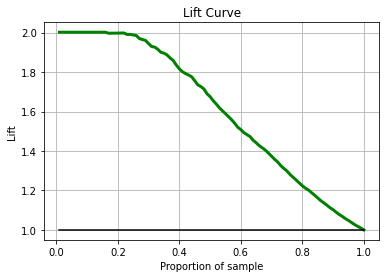

In [ ]:
plot_Lift_curve(y_test,ytestprob1)

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


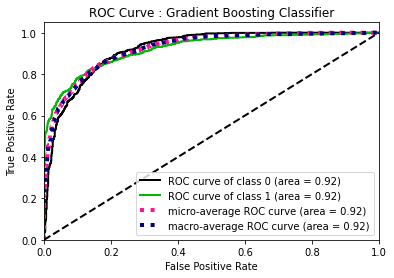

In [ ]:
skplt.metrics.plot_roc_curve(y_test, ytestprob)
plt.title("ROC Curve : Gradient Boosting Classifier")
plt.show()